<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_12__raddrizzatore_precisione/Esperienza_12_mk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 🟢 Misura delle componenti

In [2]:
r1a = 9.873 #kohm
err_r1a = math.sqrt( (r1a*0.07/100)**2 + (0.0008)**2 )
print("ohm\n", r1a*1000)
print("errore\n", err_r1a*1000)

r1b = 9.885 #kohm
err_r1b = math.sqrt( (r1b*0.07/100)**2 + (0.0008)**2 )
print("\nohm\n", r1b*1000)
print("errore\n", err_r1b*1000)

r1c = 9.943 #kohm
err_r1c = math.sqrt( (r1c*0.07/100)**2 + (0.0008)**2 )
print("\nohm\n", r1c*1000)
print("errore\n", err_r1c*1000)

r1d = 9.81 #kohm
err_r1d = math.sqrt( (r1d*0.07/100)**2 + (0.0008)**2 )
print("\nohm\n", r1d*1000)
print("errore\n", err_r1d*1000)

r2 = 4.6385 #kohm
err_r2 = math.sqrt( (r2*0.07/100)**2 + (0.0008)**2 )
print("\nohm\n", r2*1000)
print("errore\n", err_r2*1000)

ohm
 9873.0
errore
 6.957248249847061

ohm
 9885.0
errore
 6.965592598623609

ohm
 9943.0
errore
 7.005925492752546

ohm
 9810.0
errore
 6.913442630122854

ohm
 4638.5
errore
 3.3440520783175613


# 🟠 Tensione $V_{out}$ e $V_{in}$

Differenza tra i picchi alternati

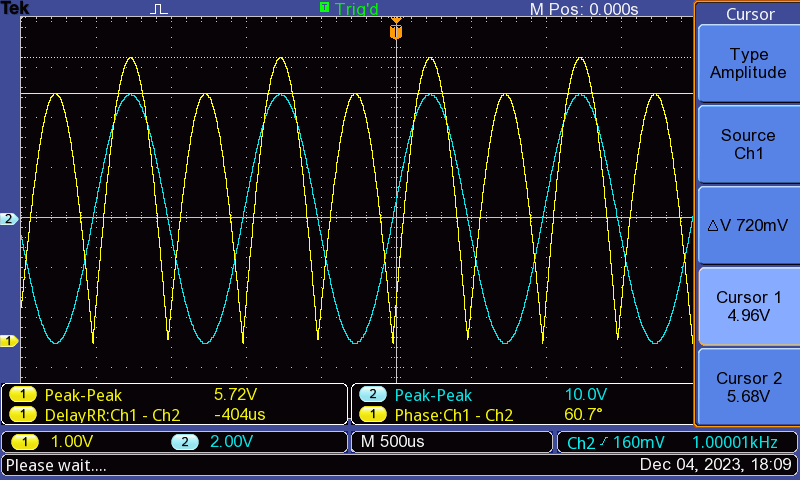

Ampiezza picco-picco (base e picco massimo)

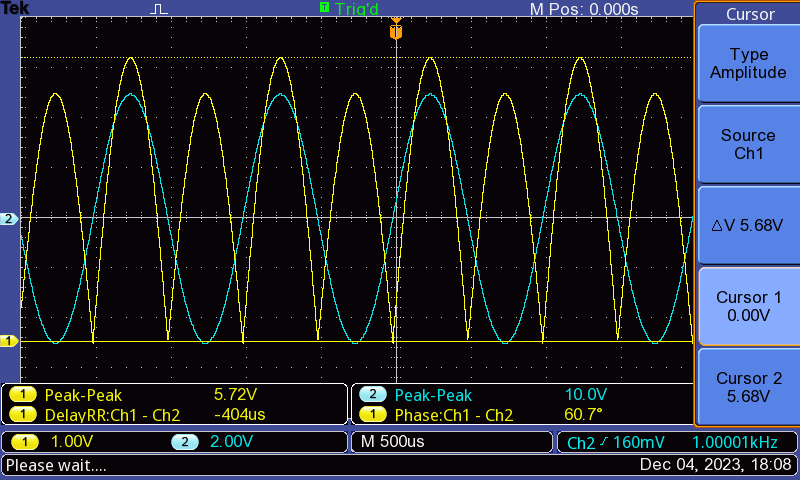

# 🟠 Tensione $V_{out}'$ e $V_{in}$

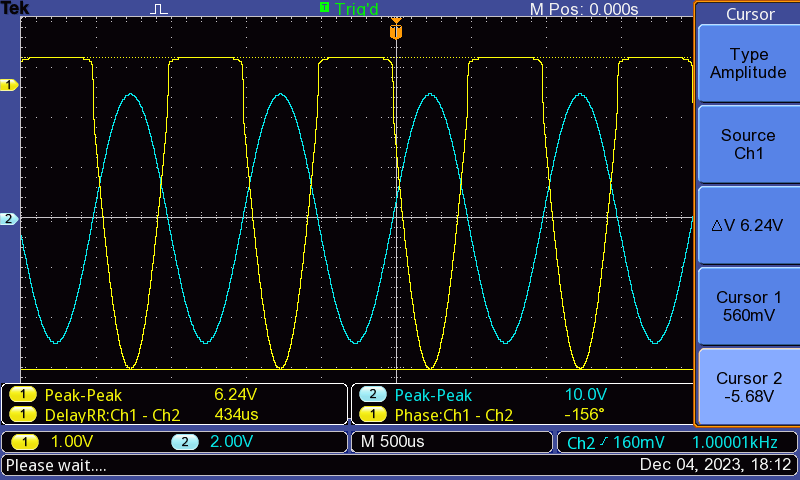

# 🟠 Tensione $V_2$ e $V_{in}$

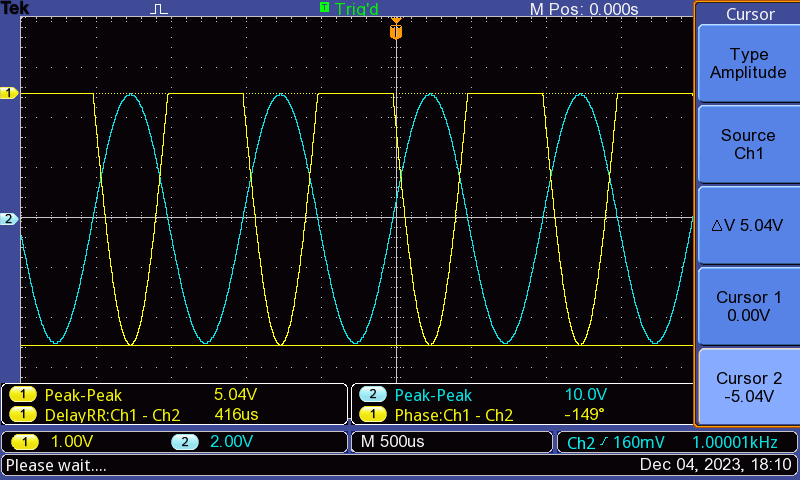

# 🔴 Soluzione teorica

# ⏳ Simulazione

##Download ed estrazione dati

In [4]:
%%shell
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_12__raddrizzatore_precisione/simulazione/dati_spice > "dati_spice"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_12__raddrizzatore_precisione/oscilloscopio/12%20Vin%20Vout%20amplificazione/vout > "dati_vout"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_12__raddrizzatore_precisione/oscilloscopio/12%20Vin%20Vo_primo/voutprimo > "dati_voutprimo"
curl https://raw.githubusercontent.com/albertos-2002/SF3/main/elettronica/esperienza_12__raddrizzatore_precisione/oscilloscopio/12%20Vin%20V2/v2out > "dati_v2"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60374  100 60374    0     0   535k      0 --:--:-- --:--:-- --:--:--  540k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65792  100 65792    0     0   638k      0 --:--:-- --:--:-- --:--:--  636k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65795  100 65795    0     0   300k      0 --:--:-- --:--:-- --:--:--  300k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65790  100 65790    0     0   220k      0 --:--:-- --:--:-- --:--:--  220k


In [5]:
tempo_spice , tensione_out_spice, tensione_in_spice, tensione_2_spice, tensione_primo_spice = np.loadtxt( "dati_spice", skiprows=1, unpack=True)

tempo_dati_vout , tensione_dati_vout = np.loadtxt( "dati_vout", skiprows=1, unpack=True)
tempo_dati_voutprimo , tensione_dati_voutprimo = np.loadtxt( "dati_voutprimo", skiprows=1, unpack=True)
tempo_dati_v2 , tensione_dati_2 = np.loadtxt( "dati_v2", skiprows=1, unpack=True)

##Simulazione $V_{out}$

In [30]:
tempo_spice_mod = []
for i in tempo_spice:
  dummy = 0
  dummy = i - 0.003025
  tempo_spice_mod.append(dummy)

Grafico

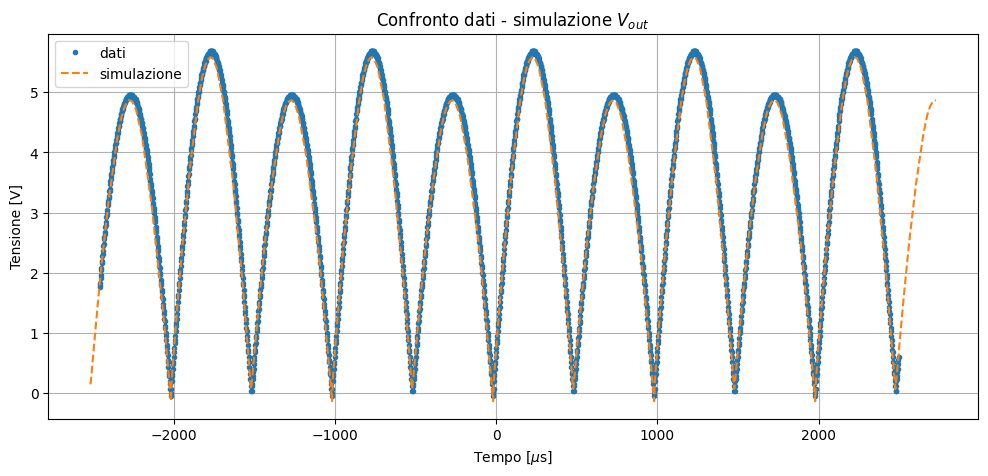

In [31]:
plt.figure(figsize=(12,5))
plt.plot( np.multiply( tempo_dati_vout , 1000000) , tensione_dati_vout , marker=".", linestyle="", label="dati")
plt.plot( np.multiply( tempo_spice_mod[50:450] , 1000000) , tensione_out_spice[50:450] , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_{out}$")
plt.ylabel("Tensione [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()

##Simulazione $V_{out}'$

In [27]:
tempo_spice_modp = []
for i in tempo_spice:
  dummy = 0
  dummy = i - 0.003025
  tempo_spice_modp.append(dummy)

Grafico

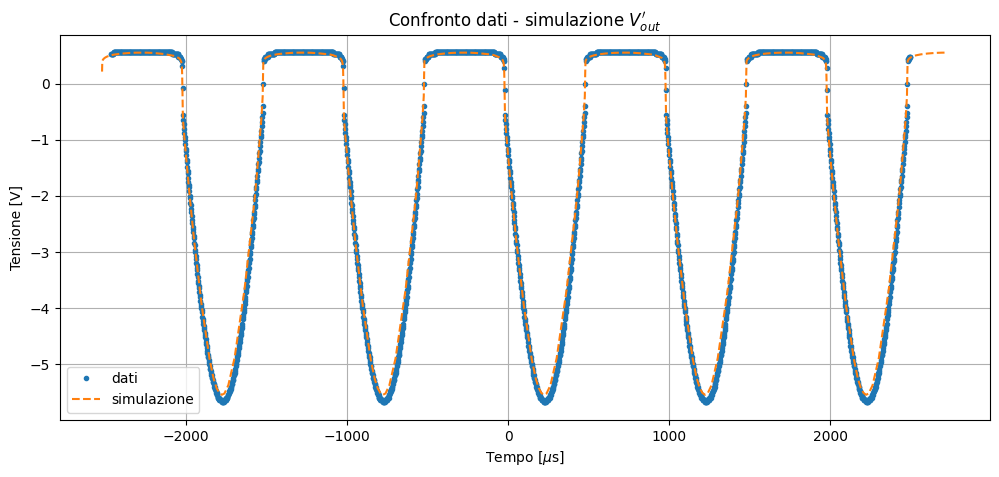

In [28]:
plt.figure(figsize=(12,5))
plt.plot( np.multiply( tempo_dati_voutprimo , 1000000) , tensione_dati_voutprimo , marker=".", linestyle="", label="dati")
plt.plot( np.multiply( tempo_spice_modp[50:450] , 1000000) , tensione_primo_spice[50:450] , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_{out}'$")
plt.ylabel("Tensione [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()

##Simulazione $V_2$

In [24]:
tempo_spice_mod2 = []
for i in tempo_spice:
  dummy = 0
  dummy = i - 0.003025
  tempo_spice_mod2.append(dummy)

Grafico

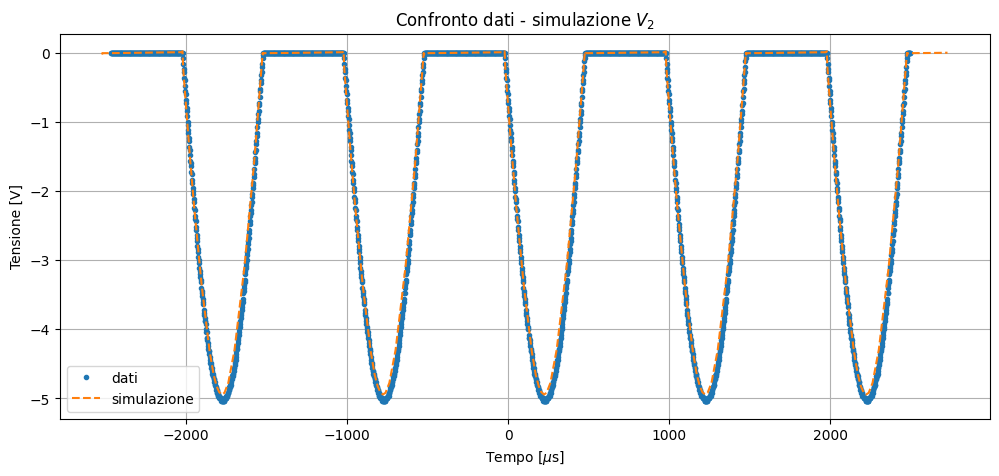

In [25]:
plt.figure(figsize=(12,5))
plt.plot( np.multiply( tempo_dati_v2 , 1000000) , tensione_dati_2 , marker=".", linestyle="", label="dati")
plt.plot( np.multiply( tempo_spice_mod2[50:450] , 1000000) , tensione_2_spice[50:450] , marker="", linestyle="--", label="simulazione")

plt.title("Confronto dati - simulazione $V_{2}$")
plt.ylabel("Tensione [V]")
plt.xlabel("Tempo [$\mu$s]")

plt.grid()
plt.legend()